In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

#Initialize the model
from langchain_openai import ChatOpenAI
model = ChatOpenAI()

d:\agenticBatch\venv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
from langchain.tools import tool

@tool
def multiply(a: float, b: float) -> float:
    """
    Multiply two float.

    Args:
        a (float): The first float.
        b (float): The second float.

    Returns:
        float: The product of a and b.
    """
    return a * b

@tool
def add(a:float,b:float)->float:
    """
    Add two float.

    Args:
        a (float): The first integer.
        b (float): The second integer.

    Returns:
        float: The addition of a and b.
    """
    return a+b 

@tool
def divide(a:float,b:float)->float:
    """
    Divide two float.

    Args:
        a (float): The first integer.
        b (float): The second integer.

    Returns:
        float: The division of a and b.
    """
    if b == 0:
        raise ValueError("Denominator cannot be 0")
    return a/b

In [3]:
#Inbuilt tool
#DuckDuckGoSearchRun is for structured results Travily is for raw results
#Provide a doc string without doc string custom tool cannot be created
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
tools = [multiply,add,divide,search]
llm_with_tools=model.bind_tools(tools)

In [4]:
#Creation of workflows
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode,tools_condition
llm_with_tools=model.bind_tools(tools)
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question

    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [5]:
workflow = StateGraph(MessagesState)
workflow.add_node("llmdecisionstep",function_1)
workflow.add_node(ToolNode(tools))
workflow.add_edge(START,"llmdecisionstep")
workflow.add_conditional_edges("llmdecisionstep",tools_condition,)
workflow.add_edge("tools","llmdecisionstep")

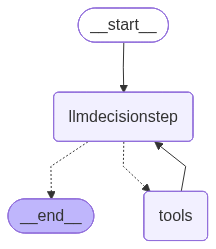

In [6]:
app=workflow.compile()
app

In [7]:
state={"messages":["hi hello how are you?"]}
result=app.invoke(state)
result

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='87793e9d-29ad-468d-888a-d5bfb8115c1c'),
  AIMessage(content="Hello! I'm just a computer program, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={'reasoning_content': 'Alright, the user greeted me with "hi hello how are you?" which is a friendly opening. I need to respond in a way that\'s welcoming and sets the stage for them to ask for help. I should acknowledge their greeting and offer my assistance. Since they mentioned "how are you," I\'ll keep it brief and polite. I want to make sure they feel comfortable asking for whatever they need next. So, I\'ll say something like, "Hello! I\'m just a computer program, but I\'m here and ready to help you with whatever you need. How can I assist you today?" That should cover it.\n'}, response_metadata={'token_usage': {'completion_tokens': 161, 'prompt_tokens': 417, 'total_tokens'

In [8]:
state={"messages":["What is 2 times of narendramodi's age?"]}
result=app.invoke(state)
result["messages"][-1]

d:\agenticBatch\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


AIMessage(content="2 times Narendra Modi's age (as of 2023) is **146**.", additional_kwargs={'reasoning_content': 'Alright, so the user is asking, "What is 2 times of narendramodi\'s age?" First, I need to figure out Narendra Modi\'s current age. I remember that he was born in 1950, so I\'ll do a quick calculation. As of 2023, he would be 73 years old. \n\nNext, the user wants to multiply his age by 2. That seems straightforward. I\'ll use the multiply tool for this. I\'ll input 2 and 73 into the tool. \n\nAfter performing the multiplication, I get 146. So, 2 times Narendra Modi\'s age as of 2023 is 146. I should present this answer clearly to the user.\n'}, response_metadata={'token_usage': {'completion_tokens': 169, 'prompt_tokens': 860, 'total_tokens': 1029, 'completion_time': 0.726319554, 'prompt_time': 0.092619768, 'queue_time': 0.050909753, 'total_time': 0.818939322}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'service_tier': 'on_demand'

In [9]:
state={"messages":["What is the speed of light in m/s and multiply it by 10?"]}
result=app.invoke(state)
result["messages"][-1].content

'The speed of light in meters per second is approximately \\(299,792,458 \\, \\text{m/s}\\). Multiplying this by 10 gives:\n\n\\[\n299,792,458 \\times 10 = 2,997,924,580 \\, \\text{m/s}\n\\]\n\nSo, the result is \\(2,997,924,580 \\, \\text{m/s}\\).'

In [10]:
state={"messages":["What is the speed of light in m/s and multiply it by 10?"]}
result=app.invoke(state)
result

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='269a7c95-74ea-4c51-bcfc-572d00093d92'),
  AIMessage(content='The speed of light in meters per second is approximately \\(299,792,458 \\, \\text{m/s}\\). Multiplying this by 10 gives:\n\n\\[\n299,792,458 \\times 10 = 2,997,924,580 \\, \\text{m/s}\n\\]\n\nSo, the result is \\(2,997,924,580 \\, \\text{m/s}\\).', additional_kwargs={'reasoning_content': "Okay, so the user is asking for the speed of light in meters per second and then to multiply that by 10. First, I need to recall the speed of light. I remember it's a constant, approximately 299,792,458 m/s. \n\nNow, the user wants this value multiplied by 10. That seems straightforward. I'll take 299,792,458 and multiply it by 10, which should give me 2,997,924,580. \n\nI should present both the original speed and the result of the multiplication clearly. Maybe I'll write it out in a sentence to mak

In [11]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
response=app.invoke({"messages":message})
response

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='bd738fd8-79df-4e8f-9ded-548cf583ccbf'),
  AIMessage(content='The speed of light in meters per second is approximately \\(299,792,458 \\, \\text{m/s}\\). Multiplying this by 10 gives:\n\n\\[\n299,792,458 \\times 10 = 2,997,924,580 \\, \\text{m/s}\n\\]\n\nSo, the result is \\(2,997,924,580 \\, \\text{m/s}\\).', additional_kwargs={'reasoning_content': "Okay, so the user is asking for the speed of light in meters per second and then to multiply that by 10. First, I need to recall the speed of light. I remember it's a constant, approximately 299,792,458 m/s. \n\nNow, the user wants this value multiplied by 10. That seems straightforward. I'll take 299,792,458 and multiply it by 10, which should give me 2,997,924,580. \n\nI should present both the original speed and the result of the multiplication clearly. Maybe I'll write it out in a sentence to mak

In [12]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================

The speed of light in meters per second is approximately \(299,792,458 \, \text{m/s}\). Multiplying this by 10 gives:

\[
299,792,458 \times 10 = 2,997,924,580 \, \text{m/s}
\]

So, the result is \(2,997,924,580 \, \text{m/s}\).


In [7]:
state={"messages":["What is 2 times of narendramodi's age?"]}
result=app.invoke(state)
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 2 times of narendramodi's age?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_XoB22W4FSIgKQSV9tRXAIUBP)
 Call ID: call_XoB22W4FSIgKQSV9tRXAIUBP
  Args:
    a: 2
    b: 70
================================= Tool Message =================================
Name: multiply

140.0
================================== Ai Message ==================================

2 times of Narendra Modi's age is 140.


In [8]:
#Yahoo tool used for finance
import yfinance as yf


In [9]:
#Tool for checking previous stock closing price
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of stock ticker from yahoo finance
    Args:
        ticker(str) : The stock ticker symbol(eg 'AAPL','TSLA','NIFTY.BO')
    Returns:
        str: A message with the stock's previous closing price
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker: '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return "Error occured while returning stock price data: {str(e)}"

In [10]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $346.60.'

In [11]:
tools = [multiply,add,divide,search,get_stock_price]
llm_with_tools1=model.bind_tools(tools)

In [12]:
SYSTEM_MESSAGE = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    question = state["messages"]
    input_prompt= [SYSTEM_MESSAGE]+question
    llm_invoke = llm_with_tools1.invoke(input_prompt)
    return {"messages":[llm_invoke]}


In [13]:
workflow = StateGraph(MessagesState)
workflow.add_node("llmdecisionmakintool",function_1)
workflow.add_node("tools",ToolNode(tools))
workflow.add_edge(START,"llmdecisionmakintool")
workflow.add_conditional_edges("llmdecisionmakintool",tools_condition,)
workflow.add_edge("tools","llmdecisionmakintool")
workflow.add_edge("tools", END)
app=workflow.compile()

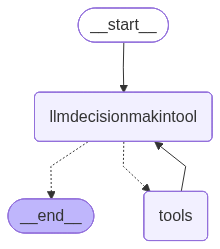

In [14]:
app

In [15]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = app.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()

d:\agenticBatch\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_aitGRqmlMQL4gq9UmQDC6dbb)
 Call ID: call_aitGRqmlMQL4gq9UmQDC6dbb
  Args:
    ticker: AAPL
  duckduckgo_search (call_1X5h6kUeHQmssXRE8ATQS6rn)
 Call ID: call_1X5h6kUeHQmssXRE8ATQS6rn
  Args:
    query: latest news Apple
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $227.16.
================================= Tool Message =================================
Name: duckduckgo_search

Jul 23, 2014 · 按我个人的理解，latest 这个词强调的是时间序列上最靠近现在，而 newest 强调的是新旧的问题。比如说，苹果的 … Breaking news from Hong Kong, China and Asia including geopolitics, diplomacy, economy, technology, lifestyle, … 知乎，中文互联网高质量的问答社区和创作者聚集的原创内容平台，于 2011 年 1 月正式上线